In [ ]:
import zipfile
import os

# Define the path of your ZIP file in Google Drive
zip_path = "/content/dataset_5000.zip"  # <-- Change this to your actual path

# Define the destination folder
extract_path = "/content/dataset5000"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files are in:", extract_path)


Extraction complete! Files are in: /content/dataset5000


In [ ]:
import os

dataset_path = ""  # Update this if needed

# List the files and folders inside the dataset directory
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Directory: {root}")
    for file in files[:5]:  # Show only the first 5 files to avoid clutter
        print(f"  📄 {file}")
    print("-" * 50)


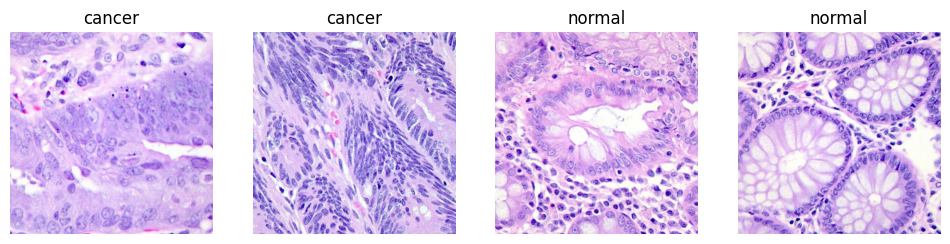

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Set dataset path
dataset_path = "/content/dataset5000/lung_colon_image_set/colon_image_sets"  # Update this if needed

# Define class folders (update if different)
class_folders = ["cancer", "normal"]  # Modify based on actual folder names

# Display sample images from both classes
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
for i, label in enumerate(class_folders):
    class_path = os.path.join(dataset_path, label)
    sample_images = random.sample(os.listdir(class_path), 2)  # Select 2 random images

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)  # Read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        ax = axes[i * 2 + j]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset paths
dataset_path = "/content/dataset5000/lung_colon_image_set/colon_image_sets"  # Update if needed
img_size = (256, 256)  # Resize images
batch_size = 64  # Number of images per batch

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values (0 to 1)
    validation_split=0.2  # 80-20 train-validation split
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print("Data preprocessing complete!")


Found 8000 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Data preprocessing complete!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification (cancer vs. normal)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(train_generator.class_indices)


{'.ipynb_checkpoints': 0, 'cancer': 1, 'normal': 2}


In [ ]:
import shutil
import os

dataset_path = "/content/dataset5000/lung_colon_image_set/colon_image_sets"

# Function to remove .ipynb_checkpoints folders
def remove_ipynb_checkpoints(directory):
    for root, dirs, files in os.walk(directory):
        for d in dirs:
            if d == ".ipynb_checkpoints":
                shutil.rmtree(os.path.join(root, d))
                print(f"Deleted: {os.path.join(root, d)}")

remove_ipynb_checkpoints(dataset_path)
print("✅ Cleanup Complete! Restart & check class indices again.")

# Reload data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print("✅ Dataset Reloaded. Now check class indices again.")


Deleted: /content/dataset5000/lung_colon_image_set/colon_image_sets/.ipynb_checkpoints
✅ Cleanup Complete! Restart & check class indices again.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
✅ Dataset Reloaded. Now check class indices again.


In [ ]:
print(train_generator.class_indices)


{'cancer': 0, 'normal': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Dataset path
dataset_path = "/content/dataset5000/lung_colon_image_set/colon_image_sets"

# Set parameters
img_size = (256, 256)  # Increased from 224x224
batch_size = 64  # Increased from 32
num_classes = 2  # Binary classification (Cancer vs Normal)


In [ ]:
# Data Augmentation and Normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixels
    validation_split=0.2  # 80% training, 20% validation
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load Validation Data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

print("✅ Dataset Loaded. Now proceed to model setup.")


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
✅ Dataset Loaded. Now proceed to model setup.


In [ ]:
# Load EfficientNetB0 (Pre-trained on ImageNet)
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,  # Remove top classifier layer
    input_shape=(256, 256, 3),  # Match image size
    weights='imagenet'  # Use pre-trained weights
)

# Freeze the base model (DO NOT train its layers initially)
base_model.trainable = False

print("✅ EfficientNetB0 Loaded & Frozen.")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ EfficientNetB0 Loaded & Frozen.


In [ ]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    base_model,  # Pre-trained base
    layers.GlobalAveragePooling2D(),  # Reduce dimensions
    layers.Dense(256, activation='relu'),  # Add dense layer
    layers.Dropout(0.3),  # Prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification (Cancer vs Normal)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Small learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Model Created & Compiled.")


✅ Model Created & Compiled.


In [ ]:
# Unfreeze base model for fine-tuning
base_model.trainable = True

# Compile again with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train again
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=7,  # Another 10 epochs
    verbose=1
)

print("✅ Fine-Tuning Completed. Check Accuracy.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4435s 35s/step - accuracy: 0.7384 - loss: 0.5760 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 2/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4266s 34s/step - accuracy: 0.9653 - loss: 0.2011 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4218s 34s/step - accuracy: 0.9884 - loss: 0.0738 - val_accuracy: 0.4845 - val_loss: 0.6977
Epoch 4/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4275s 34s/step - accuracy: 0.9947 - loss: 0.0372 - val_accuracy: 0.5035 - val_loss: 0.8044
Epoch 5/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4262s 34s/step - accuracy: 0.9963 - loss: 0.0207 - val_accuracy: 0.8315 - val_loss: 0.3812
Epoch 6/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4180s 33s/step - accuracy: 0.9985 - loss: 0.0138 - val_accuracy: 0.9805 - val_loss: 0.0723
Epoch 7/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 4251s 34s/step - accuracy: 0.9979 - loss: 0.0105 - val_accuracy: 0.9955 - val_loss: 0.0146
✅ Fine-Tuning Completed. Check Accuracy.


In [ ]:
model.save('/content/colon_cancer_model.h5')


🔥 Amazing results! 🔥

✅ Validation Accuracy: 99.55%
📉 Validation Loss: 0.0146

In [ ]:
model.save("/content/colon_cancer_model.keras")


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.9956 - loss: 0.0139
✅ Validation Accuracy: 0.9955, Loss: 0.0146


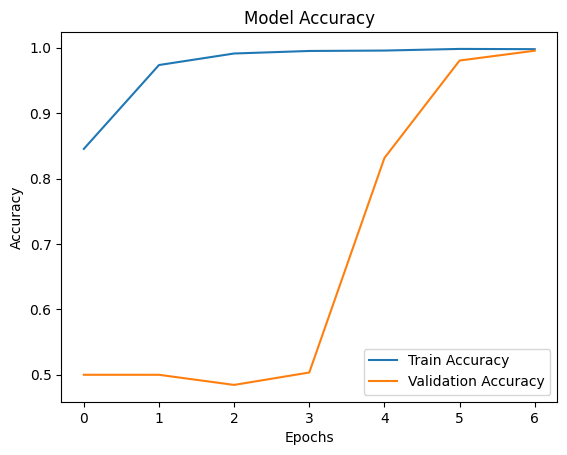

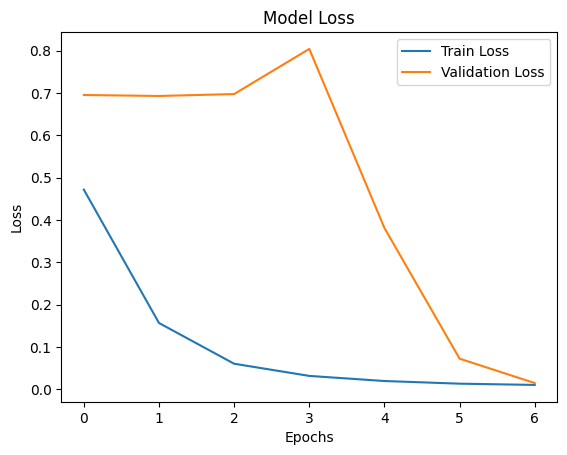

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot loss
plt.plot(history_finetune.history['loss'], labe+l='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

# Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Get uploaded file name

# Load image
img = image.load_img(img_path, target_size=(256, 256))  # Resize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Load trained model
model = tf.keras.models.load_model("/content/colon_cancer_model.keras")

# Predict
prediction = model.predict(img_array)
class_labels = {0: "Cancer", 1: "Normal"}  # Check class mapping
predicted_class = class_labels[int(prediction[0] > 0.5)]
print(f"🧐 Predicted Class: {predicted_class}")


Saving colonca28.jpeg to colonca28.jpeg


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 217 variables whereas the saved optimizer has 432 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
🧐 Predicted Class: Cancer


<ipython-input-20-f72e4f4a9f99>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

# Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Get uploaded file name

# Load image
img = image.load_img(img_path, target_size=(256, 256))  # Resize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Load trained model
model = tf.keras.models.load_model("/content/colon_cancer_model.keras")

# Predict
prediction = model.predict(img_array)
class_labels = {0: "Cancer", 1: "Normal"}  # Check class mapping
predicted_class = class_labels[int(prediction[0] > 0.5)]
print(f"🧐 Predicted Class: {predicted_class}")


Saving colonn7.jpeg to colonn7.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🧐 Predicted Class: Normal


<ipython-input-21-f72e4f4a9f99>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]


Saving colonn1.jpeg to colonn1.jpeg
Saving colonn2.jpeg to colonn2.jpeg
Saving colonn3.jpeg to colonn3.jpeg
Saving colonn4.jpeg to colonn4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<ipython-input-23-c68a780c3f15>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]


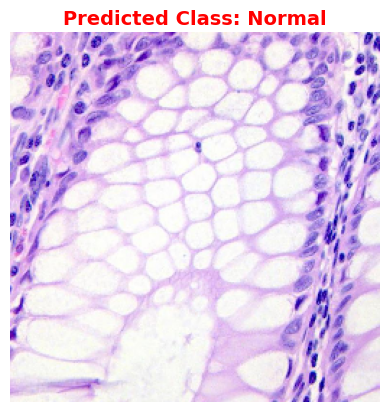

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


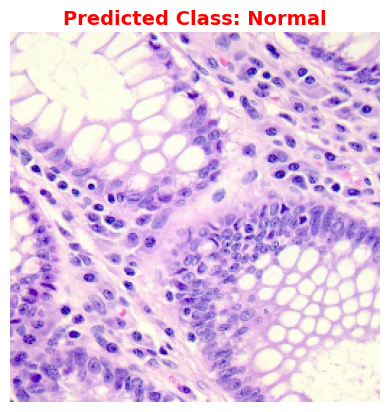

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


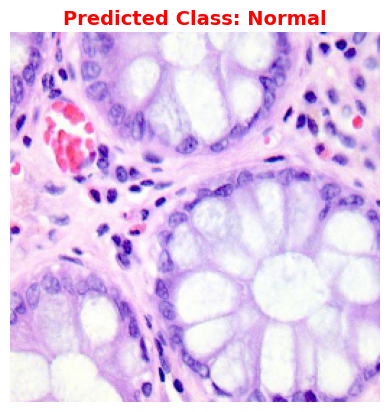

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


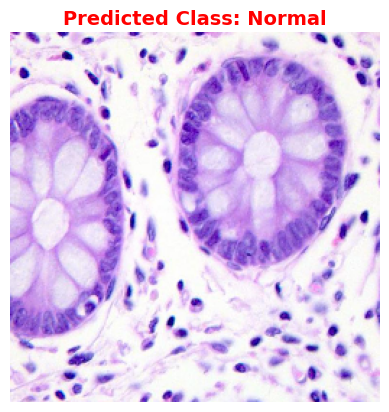

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# Upload multiple images
uploaded = files.upload()
image_paths = list(uploaded.keys())  # Get uploaded file names

# Load trained model
model = tf.keras.models.load_model("/content/colon_cancer_model.keras")

class_labels = {0: "Cancer", 1: "Normal"}  # Check class mapping

# Process and predict for each image
for img_path in image_paths:
    # Load image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_labels[int(prediction[0] > 0.5)]

    # Display image with result
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {predicted_class}", fontsize=14, fontweight="bold", color="red")
    plt.show()


Saving 3.jpeg to 3.jpeg
Saving 4.jpeg to 4.jpeg
Saving 5.jpeg to 5.jpeg
Saving 6.jpeg to 6.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<ipython-input-24-c68a780c3f15>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]


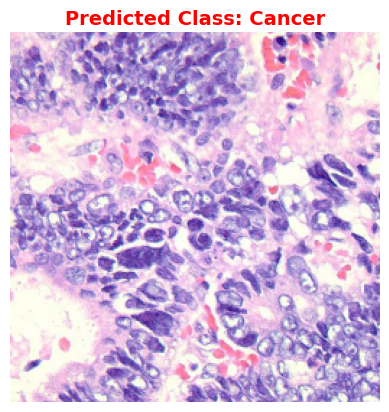

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


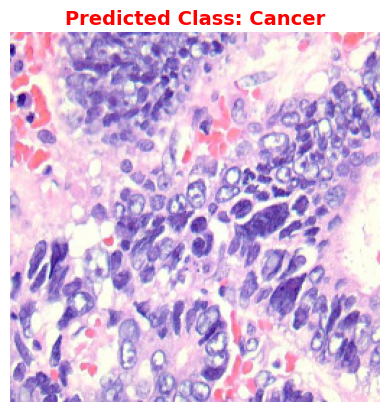

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


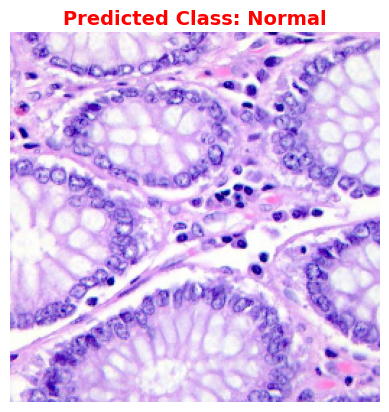

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


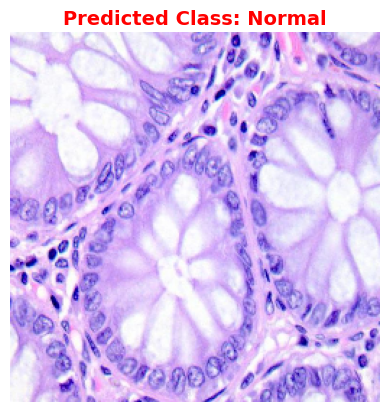

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# Upload multiple images
uploaded = files.upload()
image_paths = list(uploaded.keys())  # Get uploaded file names

# Load trained model
model = tf.keras.models.load_model("/content/colon_cancer_model.keras")

class_labels = {0: "Cancer", 1: "Normal"}  # Check class mapping

# Process and predict for each image
for img_path in image_paths:
    # Load image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_labels[int(prediction[0] > 0.5)]

    # Display image with result
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {predicted_class}", fontsize=14, fontweight="bold", color="red")
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
files.download('/content/colon_cancer_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the model as a .pkl file
with open('/content/colon_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as colon_cancer_model.pkl")


Model saved as colon_cancer_model.pkl


In [ ]:
from google.colab import files
files.download('/content/colon_cancer_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>